In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# go one step back in directorY
import os
print(os.getcwd())
os.chdir("..")
# check the current directory
print(os.getcwd())
from basics import datasets as d
# go one step ahead in directory
os.chdir("shallow_nn")
print(os.getcwd())

c:\Users\kruth\OneDrive\Desktop\DL_basics\shallow_nn
c:\Users\kruth\OneDrive\Desktop\DL_basics
c:\Users\kruth\OneDrive\Desktop\DL_basics\shallow_nn


In [3]:
def get_std_dataset(name="noisy_moons", m=400):

    noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = d.load_extra_datasets(m)
    datasets = {"noisy_circles": noisy_circles,
                "noisy_moons": noisy_moons,
                "blobs": blobs,
                "gaussian_quantiles": gaussian_quantiles}
    
    if name not in datasets and name != "planar":
        raise ValueError("Dataset not found")
    if name == "planar":
        X, Y = d.load_planar_dataset(m)
        return X, Y
    else:
        X, Y = datasets[name]
        X, Y = X.T, Y.reshape(1, Y.shape[0])

        # make blobs binary
        if name == "blobs":
            Y = Y%2

        return X, Y
    
def plot_std_dataset(X, Y):
    plt.figure(figsize=(6,4))
    plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.show()

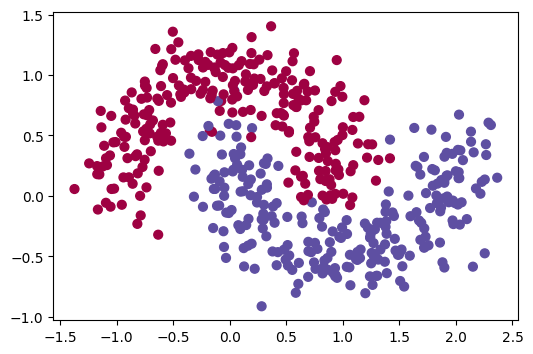

In [4]:
name = "noisy_moons"
m = 500
X, Y = get_std_dataset(name, m=m)
plot_std_dataset(X, Y)

In [5]:
print(X.shape, Y.shape)

(2, 500) (1, 500)


In [6]:
# define the size of the layers
n_x = X.shape[0] # size of input layer
n_h = 4 # size of hidden layer
n_y = Y.shape[0] # size of output layer

def initialize_params(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return params

In [7]:
def forward_prop(X, params):

    # get params
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]

    # forward prop
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1/(1 + np.exp(-Z2))

    # store the values in cache
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

    return A2, cache

In [8]:
def compute_cost(A2, Y):

    m = Y.shape[1] # number of examples
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1-Y)
    cost = -np.sum(logprobs)/m
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17

    return cost

In [9]:
def backward_prop(X, Y, cache, params):

    m = X.shape[1]
    W1 = params["W1"]
    W2 = params["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = (np.sum(dZ2, axis = 1, keepdims = True))/m
    sigmoid_derivative = (1 - np.power(A1, 2))
    dZ1 = W2.T * dZ2 * sigmoid_derivative
    dW1 = np.dot(dZ1 , X.T)/m
    db1 = (np.sum(dZ1, axis = 1, keepdims = True))/m
    

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

In [10]:
def update_params(params, grads, learning_rate = 1.2):
    # get params
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]

    # get grads
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # update params
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return params

In [11]:
def nn_model(X, Y, n_h, num_iterations = 10000, learning_rate = 1.2, print_cost=False):

    np.random.seed(42)
    n_x = X.shape[0] # no of features
    n_y = Y.shape[0] # no of output classes (binary)

    params = initialize_params(n_x, n_h, n_y)

    for i in range(0, num_iterations):

        A2, cache = forward_prop(X, params)
        cost = compute_cost(A2, Y)
        grads = backward_prop(X, Y, cache, params)
        params = update_params(params, grads, learning_rate = learning_rate)

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    print(params)
    return params

In [12]:
def predict(X, params):
        A2, cache = forward_prop(X, params)
        predictions = (A2 > 0.5)
        return predictions

In [13]:
# train and test model for the dataset
params = nn_model(X, Y, n_h = 4, num_iterations = 10000, learning_rate = 1.2, print_cost=True)

Cost after iteration 0: 0.692992


Cost after iteration 1000: 0.085233
Cost after iteration 2000: 0.061164
Cost after iteration 3000: 0.059336
Cost after iteration 4000: 0.058220
Cost after iteration 5000: 0.057348
Cost after iteration 6000: 0.056564
Cost after iteration 7000: 0.055592
Cost after iteration 8000: 0.053794
Cost after iteration 9000: 0.051000
{'W1': array([[-3.07143554,  0.95124452],
       [-3.12175621, -0.4351202 ],
       [-1.83183721,  5.8381295 ],
       [-2.15166728, -1.38613853]]), 'b1': array([[-1.62760196],
       [ 4.17824512],
       [ 2.28071442],
       [ 1.57987686]]), 'W2': array([[-8.79650945, -9.70267984, -4.51459798, 10.73757911]]), 'b2': array([[1.83892303]])}


In [14]:
# plot the decision boundary for train data
def plot_decision_boundary(X, Y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.02 # step size in the mesh
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = predict(np.c_[xx.ravel(), yy.ravel()].T, params)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)
    plt.show()

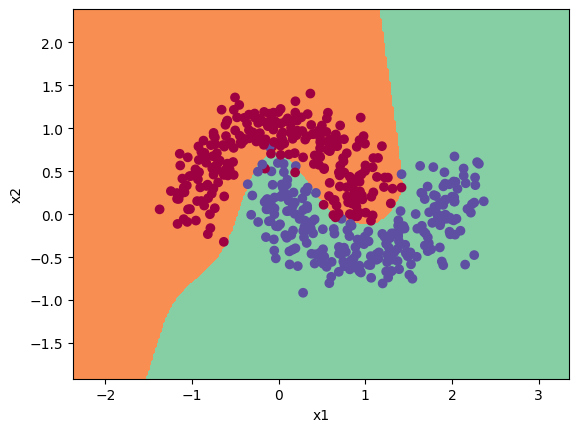

In [15]:
plot_decision_boundary(X, Y)

In [17]:
def accuracy(X, Y, params):
    predictions = predict(X, params)
    accuracy = np.mean(predictions == Y)
    return accuracy

print("Accuracy: ", accuracy(X, Y, params))

Accuracy:  0.974


{'W1': array([[-0.28422534,  1.48417774]]), 'b1': array([[0.04450827]]), 'W2': array([[-3.97929774]]), 'b2': array([[0.37859624]])}


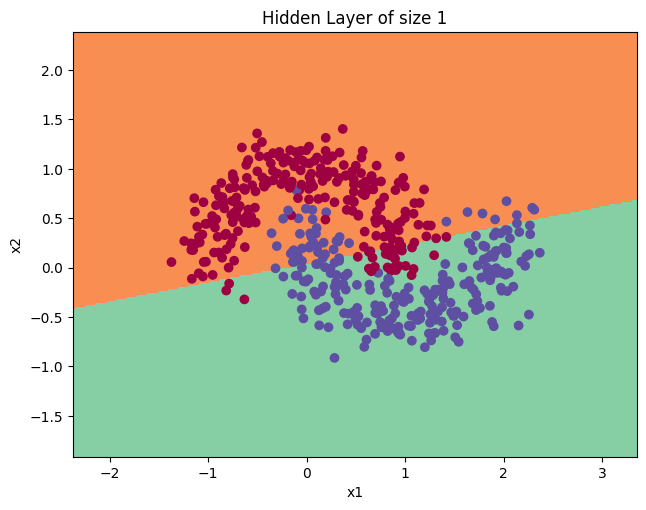

Accuracy for 1 hidden units: 0.856 %
{'W1': array([[-0.07442238,  1.17469192],
       [-5.42912979,  2.35634098]]), 'b1': array([[-5.47692440e-03],
       [ 7.76400399e+00]]), 'W2': array([[-4.9090853 , -3.49043697]]), 'b2': array([[4.18079218]])}


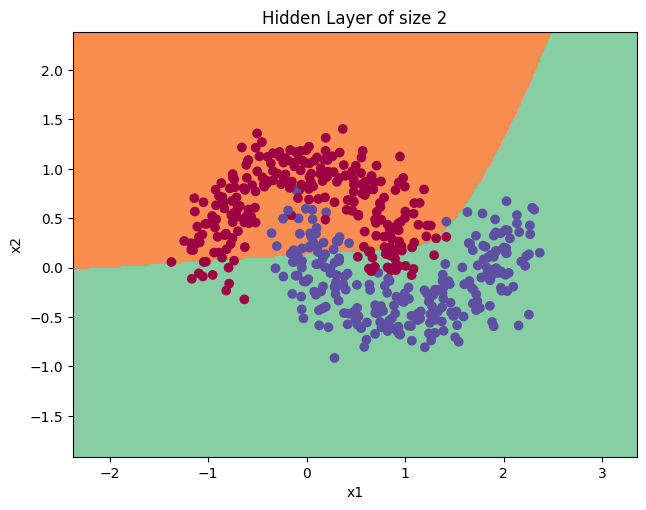

Accuracy for 2 hidden units: 0.868 %
{'W1': array([[-2.59754231, -1.90096085],
       [-2.78666735,  1.2636949 ],
       [-3.59950332,  1.17400518]]), 'b1': array([[ 1.89319541],
       [ 3.27924465],
       [-1.78732974]]), 'W2': array([[ 8.7681915 , -9.17975978, -6.84730982]]), 'b2': array([[-0.38819467]])}


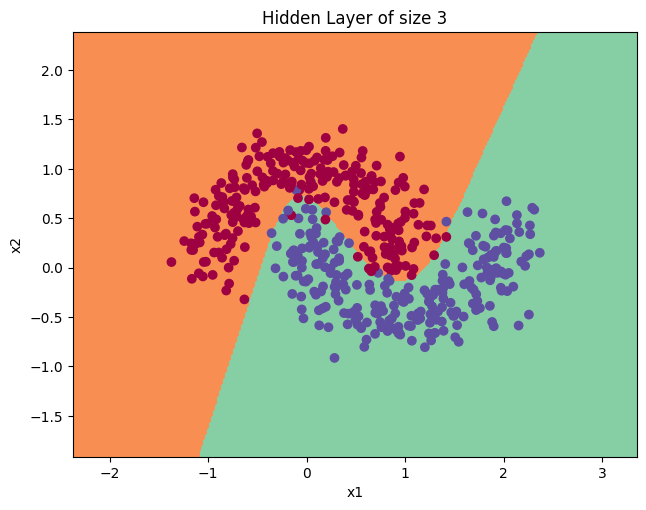

Accuracy for 3 hidden units: 0.968 %
{'W1': array([[-3.70004521,  1.24347769],
       [-2.96056407,  1.16724948],
       [-0.85587595,  1.01822191],
       [-2.64277053, -1.86480964]]), 'b1': array([[-1.87763351],
       [ 3.46333606],
       [ 1.30840482],
       [ 1.93337758]]), 'W2': array([[-6.74317913, -8.27967632, -2.27769781,  8.98936599]]), 'b2': array([[0.38411676]])}


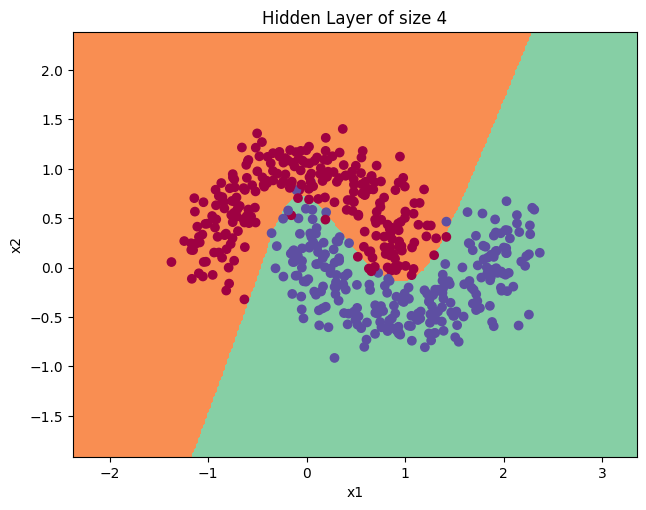

Accuracy for 4 hidden units: 0.966 %
{'W1': array([[-3.52921493, -1.73490955],
       [-4.02779169,  0.97648211],
       [-2.6899756 ,  1.33902223],
       [ 0.47838628,  0.85305581],
       [-2.1193877 , -4.13424078]]), 'b1': array([[ 2.22248664],
       [-1.8777809 ],
       [ 3.09627856],
       [-0.75112997],
       [ 1.54230459]]), 'W2': array([[ 6.86321716, -7.90348013, -8.63776825,  2.17498225,  3.98660497]]), 'b2': array([[0.35208723]])}


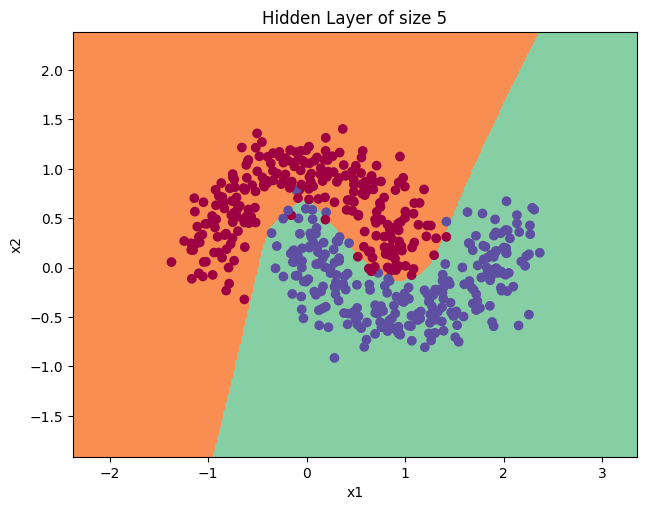

Accuracy for 5 hidden units: 0.97 %
{'W1': array([[-0.55319569,  0.24414525],
       [ 2.11808888,  3.91098952],
       [-1.17593082,  4.11088041],
       [ 3.62081495,  0.91811233],
       [ 2.45795553,  0.04027879],
       [-2.78023561, -0.18970407],
       [ 2.53658266,  0.07460183],
       [ 0.66746871, -0.32372333],
       [-1.33835685,  0.45840127],
       [-0.53836036,  0.23541347],
       [ 0.52465619, -0.22957403],
       [ 0.52926067, -0.23155105],
       [-0.53703121,  0.23478496],
       [ 0.43044507, -0.18270499],
       [-0.54874776,  0.24101207],
       [-0.50569568,  0.22176844],
       [-0.79088621,  1.11192608],
       [-0.23428483,  0.08574154],
       [ 2.06207682, -0.17031597],
       [ 5.74629588,  1.3563192 ]]), 'b1': array([[ 0.05994486],
       [-1.57945525],
       [ 1.64873509],
       [-5.27044008],
       [ 1.26831278],
       [-1.43423455],
       [ 1.31016286],
       [ 0.19772766],
       [-0.67384106],
       [ 0.08575075],
       [-0.09297687],
       

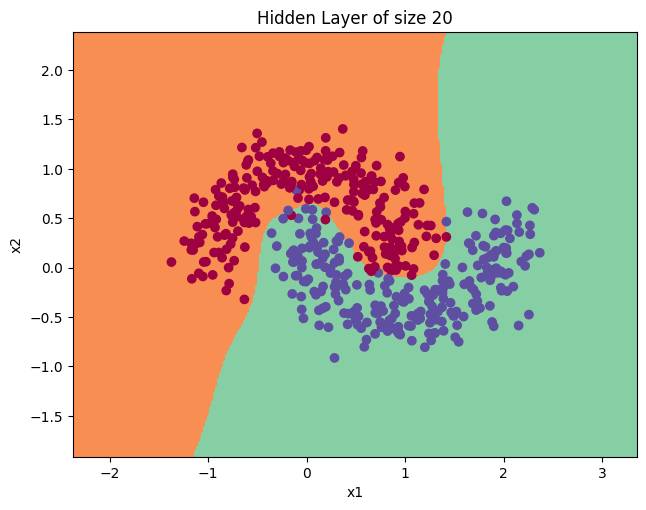

Accuracy for 20 hidden units: 0.98 %
{'W1': array([[ 7.57615003e-01,  1.32489343e-01],
       [ 1.34535248e+00,  2.68396397e+00],
       [-1.28137829e-01,  2.65111164e-01],
       [ 4.30245918e-01, -6.10157935e-02],
       [-3.95023021e-01,  9.72975975e-03],
       [ 4.49132050e-01, -7.43386895e-03],
       [ 5.09630446e-01, -3.01419699e-01],
       [ 1.21547037e+00,  2.27946066e-01],
       [-4.49822991e-01,  5.87469441e-03],
       [-1.46709599e+00, -2.53882243e-01],
       [-7.71037831e-01, -1.36808578e-01],
       [ 2.78982194e-01, -1.99873187e-02],
       [-1.28591223e+00, -2.37981835e-01],
       [-3.03509750e-01,  1.45489197e-02],
       [-1.07663383e+00, -2.07763957e-01],
       [ 5.40928933e+00, -2.97912957e-01],
       [-5.22088467e-01,  3.48873278e-01],
       [-4.43219062e-01,  2.17308066e-02],
       [ 3.85483544e+00, -1.17697204e-01],
       [-3.23131214e-01,  1.57986006e-01],
       [-3.89053640e-01,  1.17018562e-01],
       [ 2.78321387e+00,  2.13937130e+00],
       [ 1

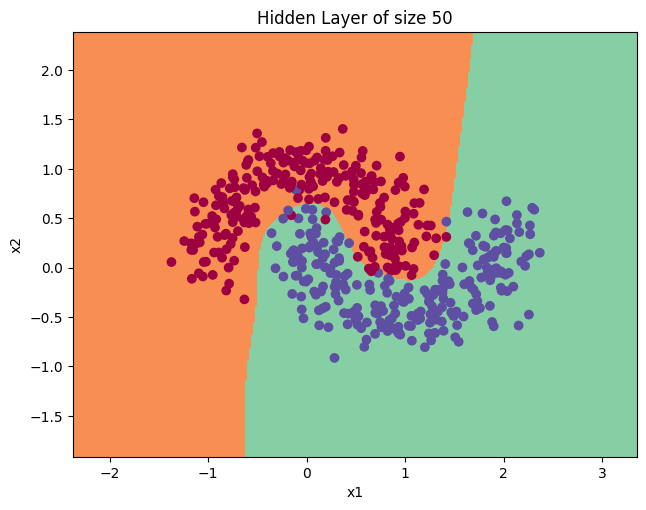

Accuracy for 50 hidden units: 0.978 %


In [21]:
# check the decision boundary for different values of hidden units
hidden_units = [1, 2, 3, 4, 5, 20, 50]

for i, n_h in enumerate(hidden_units):
    plt.figure(figsize=(16, 32))
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    params = nn_model(X, Y, n_h, num_iterations = 5000, learning_rate = 1.2, print_cost=False)
    plot_decision_boundary(X, Y)
    predictions = predict(X, params)
    accuracy = np.mean(predictions == Y)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

{'W1': array([[ 2.43753432, -1.24971768],
       [ 0.09058814,  1.84708913],
       [ 2.06186573,  0.06526993],
       [-1.59337805, -1.25942916]]), 'b1': array([[-1.48854845],
       [-1.07782965],
       [-0.35193044],
       [-1.15575062]]), 'W2': array([[-3.80172834, -4.31992416,  0.96381043, -3.43332414]]), 'b2': array([[-5.64872733]])}


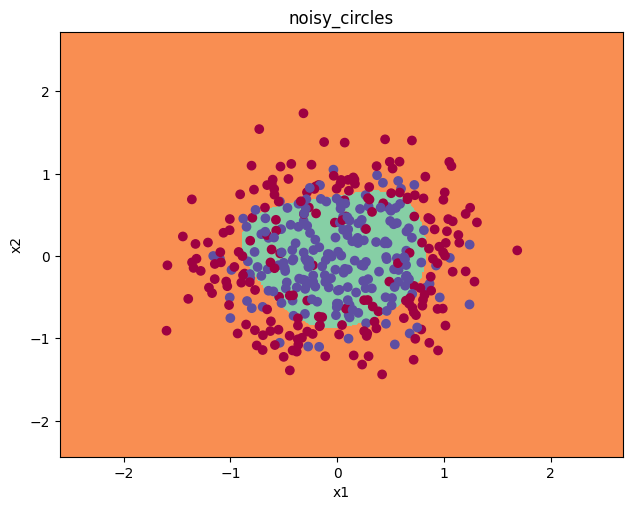

Accuracy for noisy_circles dataset: 0.7975 %
{'W1': array([[-4.38062303,  2.31485881],
       [-3.99447904,  0.88738465],
       [-0.70870169,  1.56065804],
       [-2.6448853 , -2.30431729]]), 'b1': array([[-2.94948121],
       [ 5.2925918 ],
       [ 0.09025548],
       [ 2.03946012]]), 'W2': array([[-6.55294276, -7.17304342, -2.97663987,  7.03377848]]), 'b2': array([[0.10702933]])}


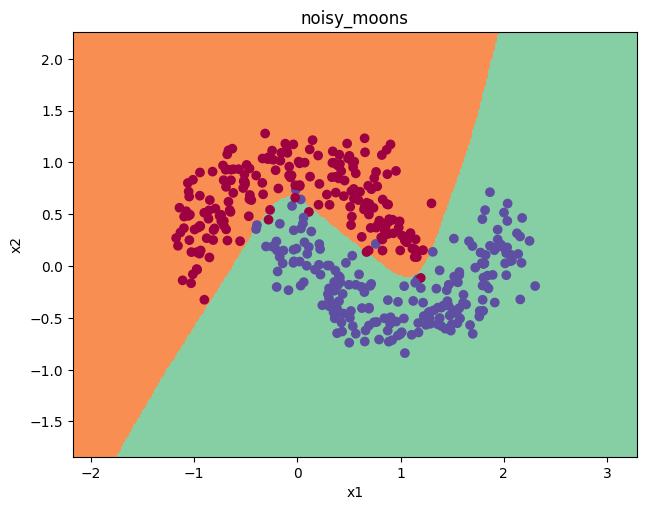

Accuracy for noisy_moons dataset: 0.9775 %
{'W1': array([[-0.04441662, -0.9062086 ],
       [ 1.18806078, -0.61838322],
       [ 1.51919156, -0.72337603],
       [ 0.04366518,  0.90419335]]), 'b1': array([[-2.11664727],
       [-2.53571958],
       [ 7.78735514],
       [ 2.10732734]]), 'W2': array([[-1.99082389,  7.47566312, -3.93799609,  1.96194022]]), 'b2': array([[0.27058088]])}


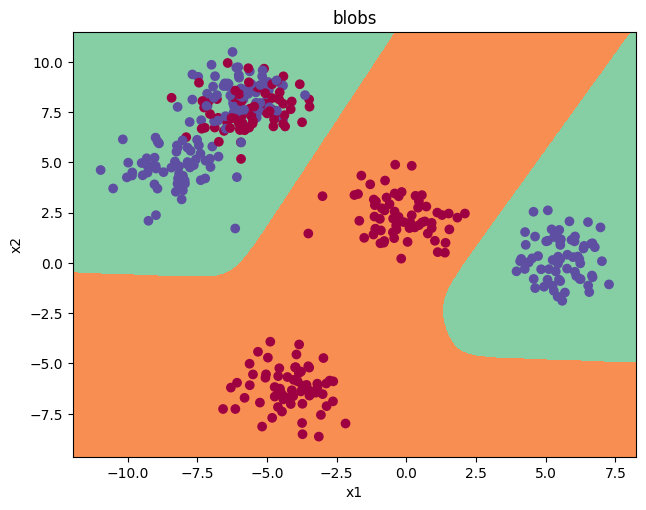

Accuracy for blobs dataset: 0.8325 %
{'W1': array([[-0.22767599, -4.11675045],
       [-2.05623987,  1.44053542],
       [-0.30086752, -3.41167632],
       [ 2.57891469,  1.52725894]]), 'b1': array([[0.78384492],
       [1.3711722 ],
       [2.27386501],
       [1.55726875]]), 'W2': array([[ -6.63788995, -13.31593143,  -6.40846564, -12.87686966]]), 'b2': array([[17.84423848]])}


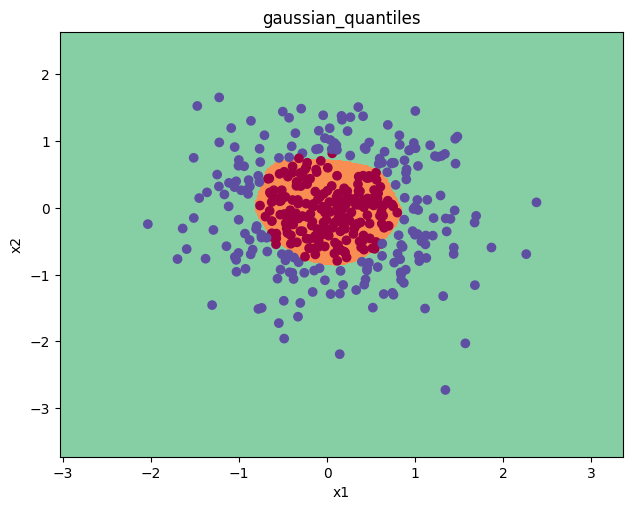

Accuracy for gaussian_quantiles dataset: 0.995 %


In [23]:
# try with different datasets
datasets = ["noisy_circles", "noisy_moons", "blobs", "gaussian_quantiles"]

for i, dataset in enumerate(datasets):
    plt.figure(figsize=(16, 32))
    plt.subplot(5, 2, i+1)
    plt.title(dataset)
    X, Y = get_std_dataset(dataset)
    params = nn_model(X, Y, n_h = 4, num_iterations = 5000, learning_rate = 1.2, print_cost=False)
    plot_decision_boundary(X, Y)
    predictions = predict(X, params)
    accuracy = np.mean(predictions == Y)
    print ("Accuracy for {} dataset: {} %".format(dataset, accuracy))